# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Load the Data

In [104]:
df=pd.read_csv("/content/Traffic_Accidents (1).csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [105]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [106]:
df.shape

(52000, 26)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [109]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
51995,False
51996,False
51997,False
51998,False


In [110]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [111]:
#impute missing vlaue
df ["Accident_Severity"].fillna(df ["Accident_Severity"].mean (),inplace=True)

In [112]:
df ["Urban_or_Rural_Area"].fillna(df ["Urban_or_Rural_Area"].mean (),inplace=True)

In [113]:
df.dropna(inplace=True)

In [114]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [115]:
#encoding for ctogrical data
label_encoder = LabelEncoder()
df["Did_Police_Officer_Attend_Scene_of_Accident"] = label_encoder.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])
df["Road_Surface_Conditions"] = label_encoder.fit_transform(df["Road_Surface_Conditions"])
df["Weather_Conditions"] = label_encoder.fit_transform(df["Weather_Conditions"])
df["Light_Conditions"] = label_encoder.fit_transform(df["Light_Conditions"])
df["Pedestrian_Crossing-Physical_Facilities"] = label_encoder.fit_transform(df["Pedestrian_Crossing-Physical_Facilities"])
df["Pedestrian_Crossing-Human_Control"] = label_encoder.fit_transform(df["Pedestrian_Crossing-Human_Control"])
df["Road_Type"] = label_encoder.fit_transform(df["Road_Type"])
df["Local_Authority_(Highway)"] = label_encoder.fit_transform(df["Local_Authority_(Highway)"])
df["Date"] = label_encoder.fit_transform(df["Date"])

In [116]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,2901,6,...,-1,0,2,2,0,4,1,2.0,1,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1057,1,...,6,0,2,2,2,1,0,1.0,1,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,1476,4,...,3,4055,2,2,4,1,0,1.0,1,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,1901,7,...,6,0,2,2,4,5,5,1.0,1,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,610,3,...,-1,0,2,2,4,1,0,1.0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,3265,6,...,6,6485,2,3,4,1,0,1.0,1,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,799,4,...,-1,0,2,2,0,1,0,2.0,1,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,95,3,...,6,0,2,2,4,5,5,1.0,1,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,2327,6,...,5,81,2,2,4,5,5,1.0,1,2011


In [117]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(["Date"], axis=1))
print(scaled_features)

[[ 1.26375309 -1.21398419  1.21852781 ...  1.33410335  0.48339946
  -0.13341458]
 [ 0.72058105 -0.6977572   0.71234593 ... -0.75073209  0.48339946
   0.1990603 ]
 [-1.3230157  -0.80966221 -1.29049812 ... -0.75073209  0.48339946
  -1.46331407]
 ...
 [ 1.05329627 -0.91437155  1.02884261 ... -0.75073209  0.48339946
   0.53153517]
 [-0.05880302  0.21305281 -0.04183697 ... -0.75073209  0.48339946
   0.53153517]
 [ 0.15133844 -0.7085507   0.15349303 ...  1.33410335  0.48339946
   0.1990603 ]]


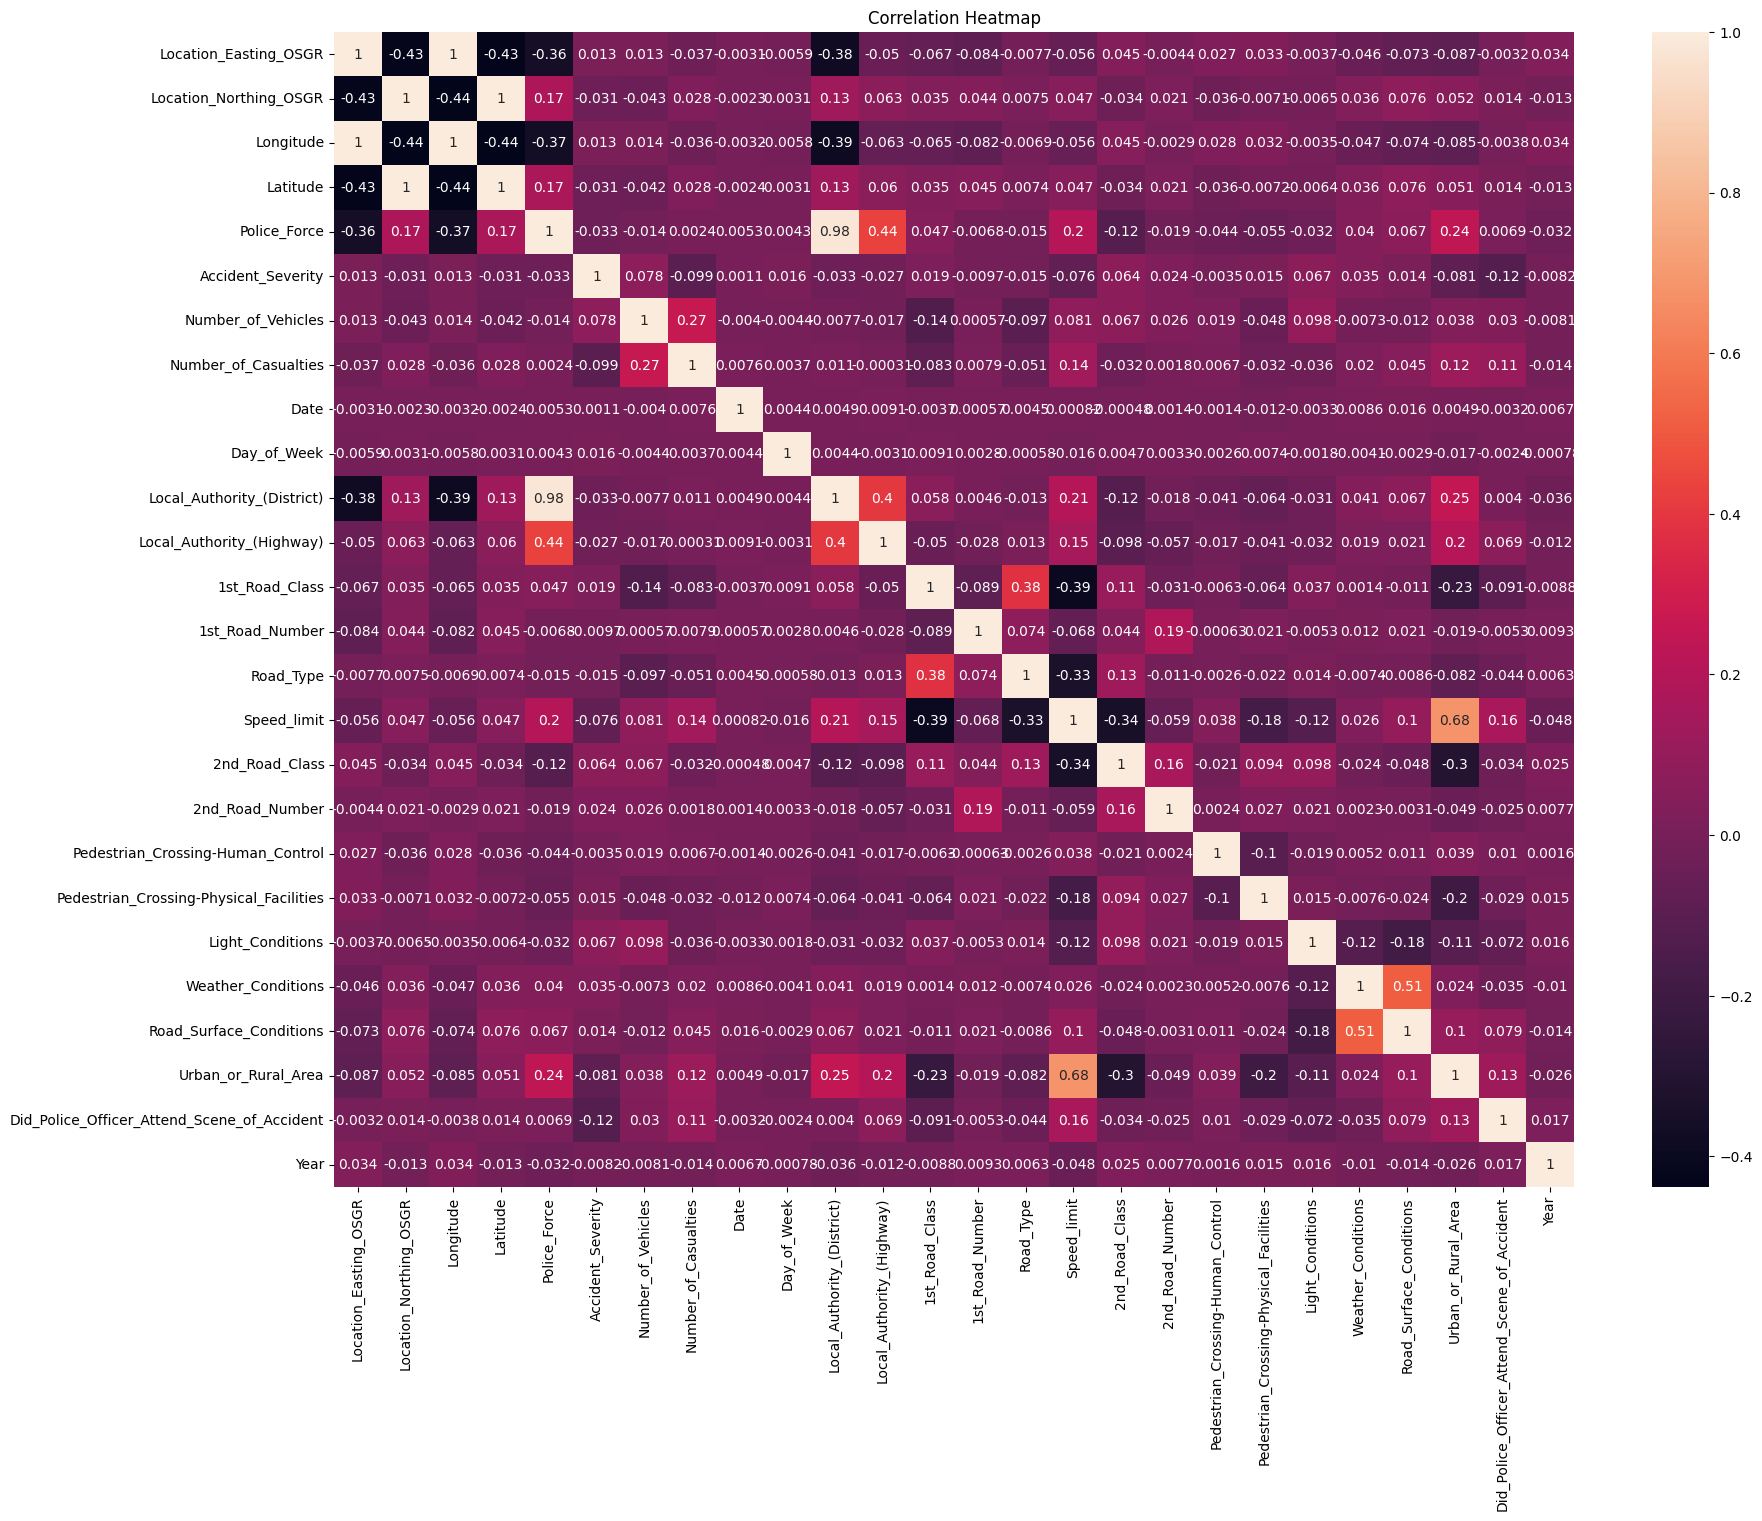

In [118]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

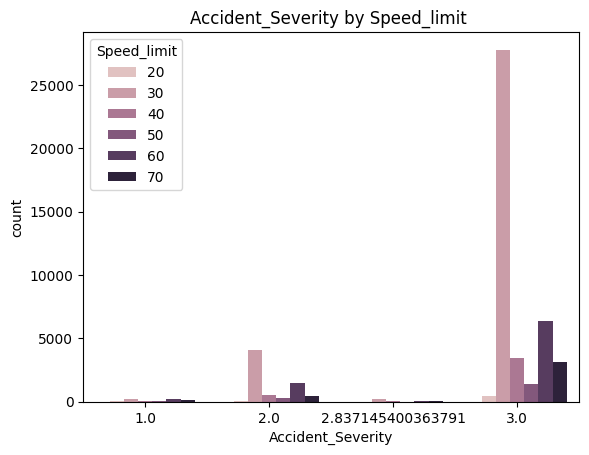

In [119]:
sns.countplot(x='Accident_Severity', data=df, hue="Speed_limit")
plt.title('Accident_Severity by Speed_limit ')
plt.show()

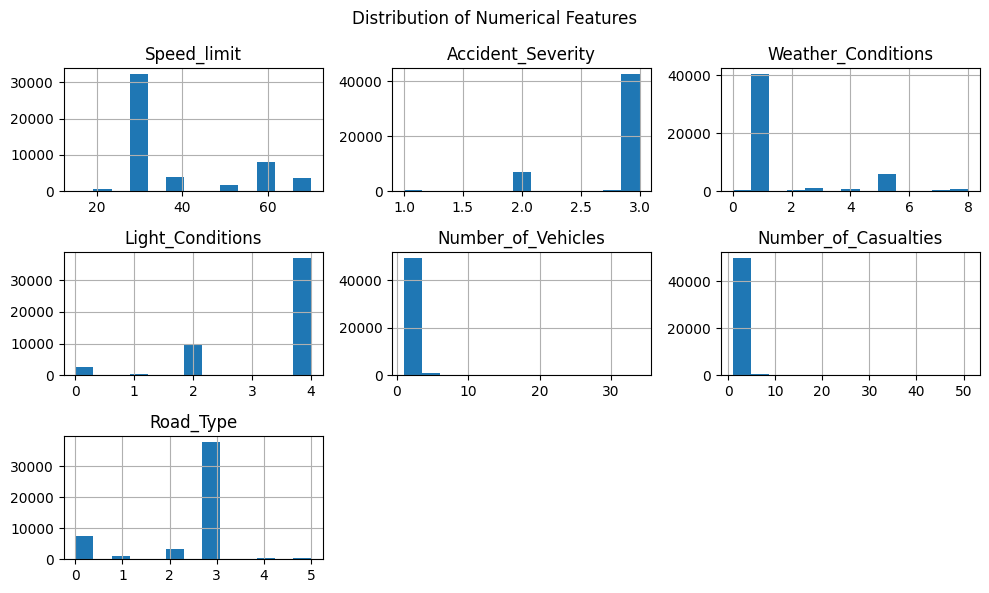

In [120]:
numerical_features = ['Speed_limit', 'Accident_Severity',  'Weather_Conditions',  'Light_Conditions' , 'Number_of_Vehicles',  'Number_of_Casualties',  'Road_Type']
df[numerical_features].hist(bins=13, figsize=(10, 6))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [130]:
pca = PCA(n_components=0.5)
pca_data = pca.fit_transform(scaled_features)
print(pca_data)

[[ 0.08890021  4.38989661 -0.54928689 ... -0.75237848 -1.79724575
  -0.16257321]
 [-2.42539526 -0.2287722   0.05082739 ... -0.39410701  0.42315708
  -0.28406486]
 [ 1.42674563 -1.10014127 -2.86111899 ...  1.5413911   0.54879112
  -0.38019684]
 ...
 [-0.89704737  0.66792486 -1.49345574 ...  1.51980506  0.72007151
   0.76169172]
 [-0.36119985 -1.21112021  0.79811671 ...  0.85556953  1.04862354
   1.01815156]
 [ 0.5551764   2.41270538 -0.74328357 ...  0.12261268  0.45544157
   0.57334575]]


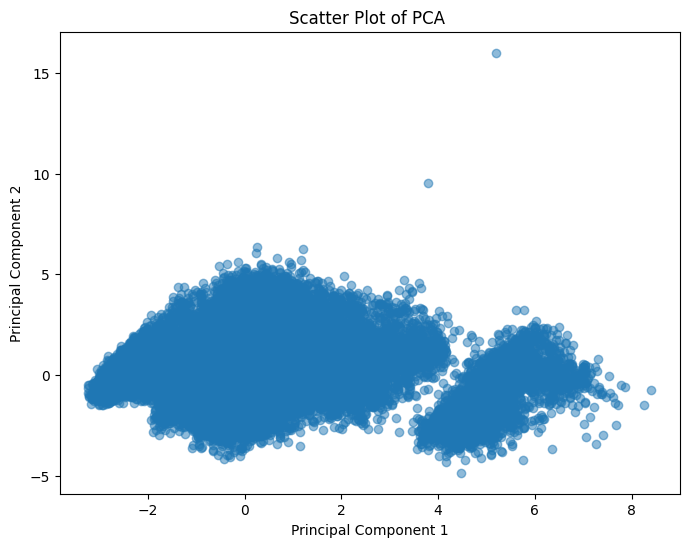

In [131]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Scatter Plot of PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [134]:
#i chocies the study to be on Accident_Severity and compare it with athour features
X=df.drop(["Accident_Severity"],axis=1)
y=df["Accident_Severity"]

In [124]:
#here creating elbow method to help me to chose num
inertia = []
for i in range(1,14):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(pca_data)
  inertia.append(kmeans.inertia_)

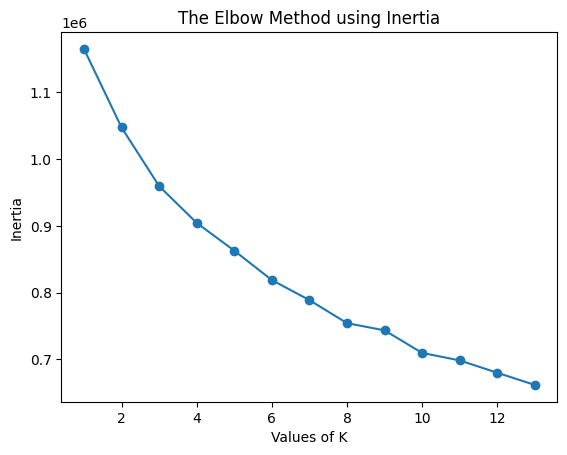

In [125]:
# plt.figure(figsize=(8,6))
plt.plot(range(1,14), inertia, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

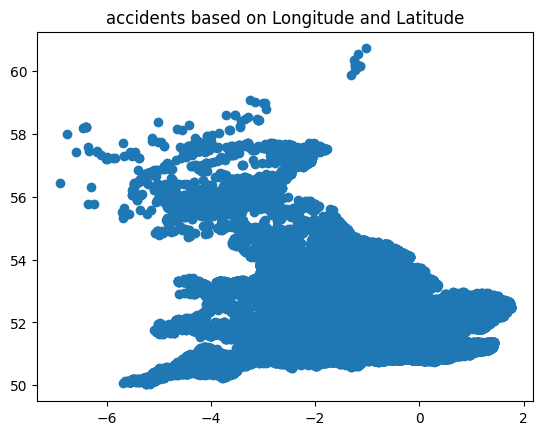

In [126]:
plt.scatter(x='Longitude', data=df, y="Latitude")
plt.title('accidents based on Longitude and Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [127]:
n_clusters = 5 # Choose the optimal n_clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

#print the centers and labels
print("Cluster Centers:", centers)
print("Cluster Labels:", labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers: [[-1.74322933e-01 -1.31196562e+00  9.87167881e-01  2.20687096e-03
  -2.79217898e-02  1.24891728e-01  3.22162366e-02 -1.99237846e-01
   5.80570540e-02  2.98277703e-02  4.11193305e-02  8.23835682e-02
  -9.51255553e-03 -3.62150353e-02  2.23948793e-02  7.13559834e-03
   5.30660688e-02 -4.30997430e-02]
 [ 4.81531177e-01  2.14728516e+00  5.03260008e-01  1.86247123e-02
  -2.84345918e-01  1.20309095e-02 -3.35081335e-02 -9.75544472e-02
  -1.62509754e-01  5.13111397e-02  7.79936097e-02  1.88232848e-01
  -2.97310634e-02 -4.73613556e-02  6.55371477e-02  2.08623941e-01
  -1.62338862e-01 -6.33389250e-02]
 [ 5.09359871e+00 -1.27235660e+00 -5.09366385e-01  2.38845281e-01
  -2.92189685e-01 -5.75493668e-01 -1.80463234e-01  8.97884292e-01
  -9.81483221e-01  1.68733711e-02 -4.05755574e-02 -4.48076143e-01
   2.19877284e-01  2.03637183e-02  5.27102735e-02 -2.70936208e-01
   2.03369740e-01 -1.79338231e-01]
 [ 1.31204213e+00  4.05423522e-02 -1.52472676e+00  2.75231177e-02
   7.62314088e-01  3

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [138]:
Sli = metrics.silhouette_score(pca_data, labels)
print("Silhouette Coefficient:%0.2f" % Sli)



Silhouette Coefficient:0.18


## Plot the data points with their predicted cluster center

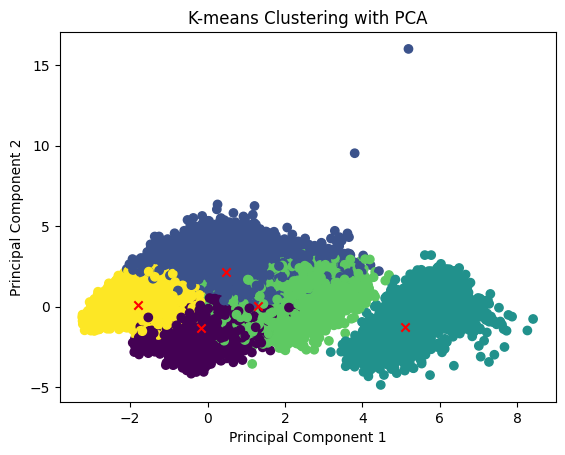

In [139]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
   i choose all fetures to comapre it with accdint_severty
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   by using elbow method i defind the best number
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?Silhouette Coefficient and Adjusted Rand Index
   - How do these metrics help in understanding the effectiveness of Silhouette:your clustering approach?
   measures how similar an object is to its own cluster compared to other clusters
   
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?